## 1. Sentiment Analysis

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rimisharma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en"
   # page_size=100,
   # sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 4671


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en"
   # page_size=100,
   # sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]



Total articles about Ethereum: 1290


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)




bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,A former Microsoft software engineer from Ukra...,2020-11-12,-0.6705,0.064,0.199,0.737
1,Visa has partnered with cryptocurrency startup...,2020-12-03,0.6369,0.162,0.000,0.838
2,PayPal is bringing its newly-announced support...,2020-11-12,0.2144,0.053,0.000,0.947
3,"In November 2017, after an absolutely massive,...",2020-11-20,0.2023,0.050,0.000,0.950
4,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)



ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,PayPal is bringing its newly-announced support...,2020-11-12,0.2144,0.053,0.0,0.947
1,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.0,1.000
2,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.0,1.000
3,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,0.4215,0.088,0.0,0.912
4,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,0.1779,0.052,0.0,0.948


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.170479,0.056895,0.014421,0.928684
std,0.328269,0.066958,0.047886,0.087898
min,-0.670500,0.000000,0.000000,0.737000
25%,0.000000,0.000000,0.000000,0.860500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.199000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

### Q: Which coin had the highest mean positive score?

#### Ethereum

### Q: Which coin had the highest compound score?

#### Ethereum

### Q. Which coin had the highest positive score?

#### Ethereum

## 2. Natural Language Processing

### Tokenizer

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    return text

In [16]:

# Create a new tokens column for bitcoin
bitcoin_tokens = []

bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)




In [17]:
bitcoin_df

,text,date,compound,positive,negative,neutral,tokens
0,A former Microsoft software engineer from Ukra...,2020-11-12,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,Visa has partnered with cryptocurrency startup...,2020-12-03,0.6369,0.162,0.000,0.838,"[visa, ha, partnered, cryptocurrency, startup,..."
2,PayPal is bringing its newly-announced support...,2020-11-12,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,"In November 2017, after an absolutely massive,...",2020-11-20,0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."
5,If youve been watching the crypto markets over...,2020-11-25,0.4404,0.152,0.075,0.773,"[youve, watching, crypto, market, past, week, ..."
6,Six years after the launch of the Mexico-based...,2020-12-09,0.0000,0.000,0.000,1.000,"[six, year, launch, mexicobased, crypotcurrenc..."
7,Decentralized exchange protocols that allow cr...,2020-12-03,0.4019,0.117,0.000,0.883,"[decentralized, exchange, protocol, allow, cry..."
8,4. U.S. markets ended November with large gain...,2020-11-30,0.7650,0.171,0.000,0.829,"[u, market, ended, november, large, gain, even..."
9,"Maisie Williams also known as Arya Stark, daug...",2020-11-17,0.0000,0.000,0.000,1.000,"[maisie, williams, also, known, arya, stark, d..."


In [18]:

# Create a new tokens column for bitcoin
ethereum_tokens = []

ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)


In [19]:
ethereum_df

,text,date,compound,positive,negative,neutral,tokens
0,PayPal is bringing its newly-announced support...,2020-11-12,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.000,1.000,"[file, photo, representation, virtual, currenc..."
2,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.000,1.000,"[file, photo, representation, virtual, currenc..."
3,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,0.4215,0.088,0.000,0.912,"[london, reuters, digital, currency, xrp, soar..."
4,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,0.1779,0.052,0.000,0.948,"[new, york, reuters, institutional, investor, ..."
5,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,0.1779,0.052,0.000,0.948,"[new, york, reuters, institutional, investor, ..."
6,"PayPal has launched the Generosity Network, a ...",2020-11-19,0.8779,0.318,0.000,0.682,"[paypal, ha, launched, generosity, network, pl..."
7,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,0.0000,0.000,0.000,1.000,"[reuters, staff, file, photo, representation, ..."
8,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,0.0000,0.000,0.000,1.000,"[reuters, staff, file, photo, representation, ..."
9,The New York Times is (probably) about to publ...,2020-11-26,0.0000,0.000,0.000,1.000,"[new, york, time, probably, publish, story, cr..."


### NGrams and Frequency Analysis

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in bitcoin_df.tokens]
dict(btc_bigram_counts[0].most_common(10))

{('former', 'microsoft'): 1,
 ('microsoft', 'software'): 1,
 ('software', 'engineer'): 1,
 ('engineer', 'ukraine'): 1,
 ('ukraine', 'ha'): 1,
 ('ha', 'sentenced'): 1,
 ('sentenced', 'nine'): 1,
 ('nine', 'year'): 1,
 ('year', 'prison'): 1,
 ('prison', 'stealing'): 1}

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in ethereum_df.tokens]
dict(eth_bigram_counts[0].most_common(10))

{('paypal', 'bringing'): 1,
 ('bringing', 'newlyannounced'): 1,
 ('newlyannounced', 'support'): 1,
 ('support', 'cryptocurrency'): 1,
 ('cryptocurrency', 'u'): 1,
 ('u', 'account'): 1,
 ('account', 'first'): 1,
 ('first', 'announced'): 1,
 ('announced', 'plan'): 1,
 ('plan', 'open'): 1}

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

bigstr = []
for tokens in bitcoin_df.tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 19), ('currency', 8), ('reuters', 8)]

In [25]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

bigstr = []
for tokens in ethereum_df.tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 20), ('reuters', 15), ('photo', 10)]

### Word Clouds

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

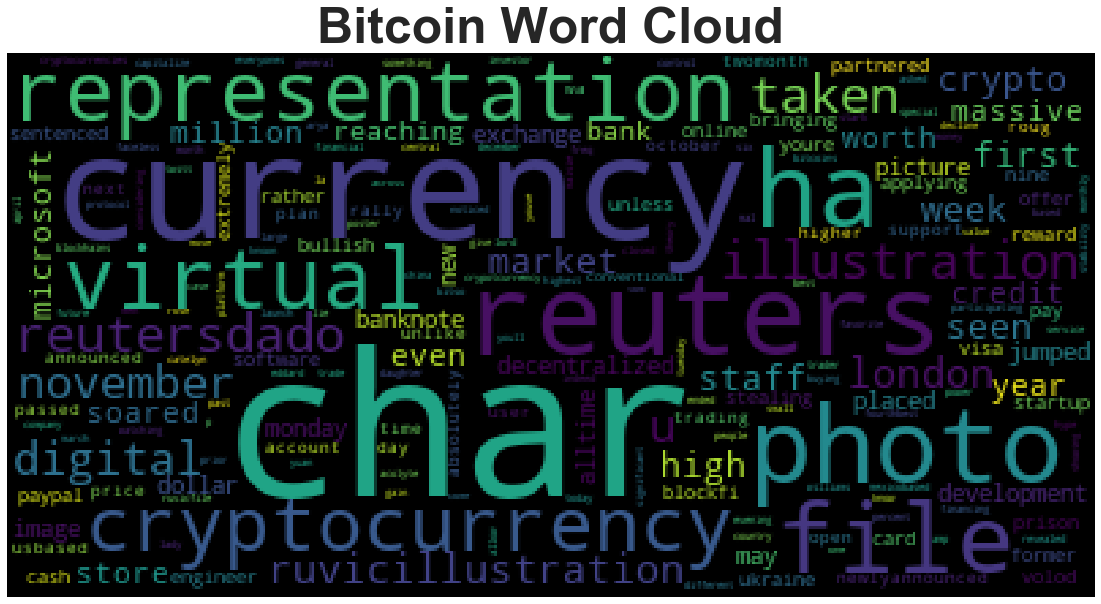

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in bitcoin_df.text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

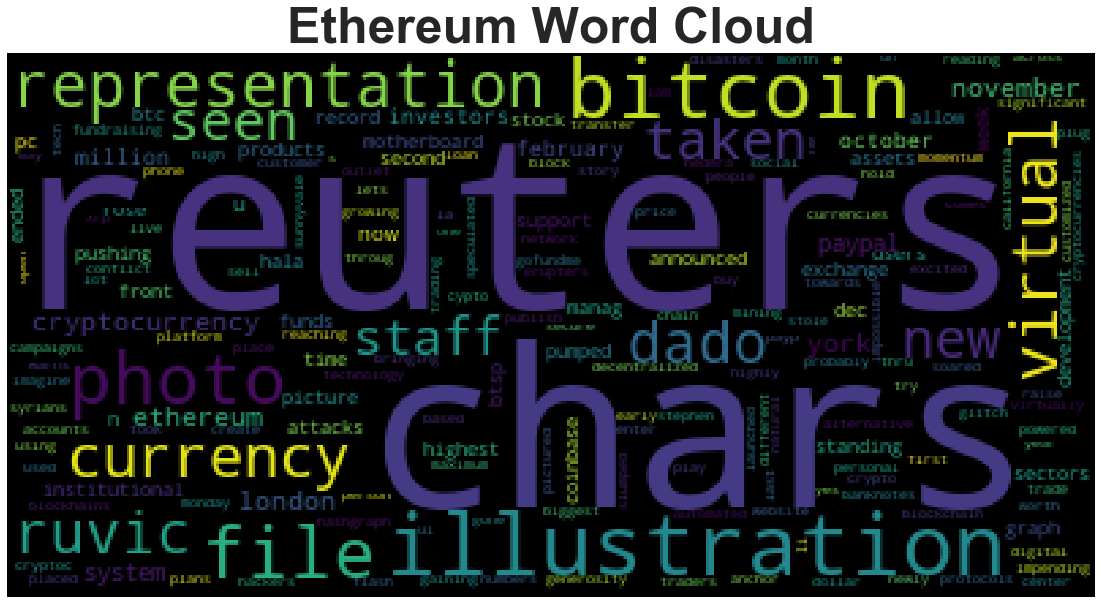

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

eth_corpus = ''
for token in ethereum_df.text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

## 3. Named Entity Recognition

In [29]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

btc_corpus

"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the c

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(btc_ner, style='ent')


In [34]:
# List all Entities
# YOUR CODE HERE!

btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$62 million',
 '10,000',
 '10.8 percent',
 '12,800',
 '19,665',
 '2016 to 2018',
 '500',
 '7',
 'April',
 'Arya Stark',
 'BBC News',
 'Bitcoin',
 'December 2017',
 'Eddard',
 'February 3, 2018',
 'Justin HarperBusiness',
 'Lady Catelyn',
 'March 13, 2020',
 'May 26, 2020',
 'Mexico',
 'Microsoft',
 'Monday',
 'November',
 'November 19, 2020',
 'November 2017',
 'October',
 'REUTERS/',
 'REUTERS/Dado Ruvic/Illustration',
 'Reuters',
 'Tom Wilson',
 'Tuesday',
 'U.S.',
 'US',
 'Ukraine',
 'Williams',
 'XRP',
 'above $17,000',
 'above $18,000',
 'acolyte',
 'bitcoin',
 'chars]4',
 'chars]8',
 'digital',
 'digital yuan',
 'evening',
 'first',
 'fourth',
 'hype',
 'monthly',
 'more than $10 million',
 'more than $18,000',
 'nine years',
 'the Faceless Men',
 'the People’s Bank of China',
 'the next 20 days',
 'the past few weeks',
 'this week',
 'three-year',
 'today',
 'two-month'}

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

eth_corpus

"paypal is bringing its newly-announced support for cryptocurrency to all us accounts. it first announced plans to open cryptocurrency trading to us-based users in october, but until now it was only a… [+589 chars]file photo: representation of the ethereum virtual currency standing on the pc motherboard is seen in this illustration picture, february 3, 2018. reuters/dado ruvic/illustration\r\nlondon (reuters) - … [+1237 chars]file photo: representation of the ethereum virtual currency standing on the pc motherboard is seen in this illustration picture, february 3, 2018. reuters/dado ruvic/illustration\r\nlondon (reuters) - … [+1237 chars]london (reuters) - digital currencies ethereum and xrp soared on monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nfile photo: representation of the ethereum virtual currency… [+1950 chars]new york (reuters) - institutional investors pumped $429 million into cryptocurrency funds and products for the week ended dec. 7, the sec

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

eth_ner = nlp(eth_corpus)
eth_ner.user_data["title"] = "Ethereum NER"

# Add a title to the document
# YOUR CODE HERE!



In [37]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(eth_ner, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!

eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$24 million',
 '$429 million',
 '1',
 '20,000',
 'bitcoin',
 'btsp rose',
 'california',
 'chars]london',
 'chars]new york',
 'chars]the new york times',
 'dado ruvic',
 'early february this year',
 'february 3, 2018',
 'first',
 'hedera',
 'last month',
 'london',
 'may 26, 2020',
 'monday',
 'new york',
 'november 19, 2020',
 'october',
 'october 28, 2013',
 'one',
 'paypal',
 'reuters',
 'reuters/stephen lam\r\n<ul><li',
 'second',
 'sunnyvale',
 'the week ended dec. 7',
 'u.s.',
 'un',
 'us',
 'xrp'}